In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_table("../drugsCom_raw/drugsComTrain_raw.tsv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [4]:
dataset.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [11]:
dataset["drugName"].isna().sum()

0

In [12]:
dataset.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

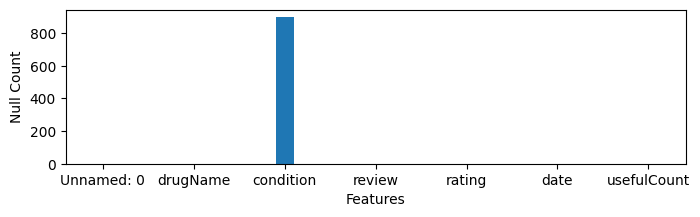

In [5]:
##1. Check Nan values
x = []
y= []
fig = plt.figure(figsize = ( 8, 2))

for col in dataset.columns:
    x.append(col)
    y.append(dataset[col].isna().sum())

plt.bar(x,y,width=0.2)
plt.xlabel("Features")
plt.ylabel("Null Count")
plt.show()

In [6]:
##2. check unique rows 
dataset.nunique()
## Unnamed: O column is like an ID for every row since there are 161297 
## unique ID which means there are no duplicates in the dataset

Unnamed: 0     161297
drugName         3436
condition         884
review         112329
rating             10
date             3579
usefulCount       389
dtype: int64

<AxesSubplot:>

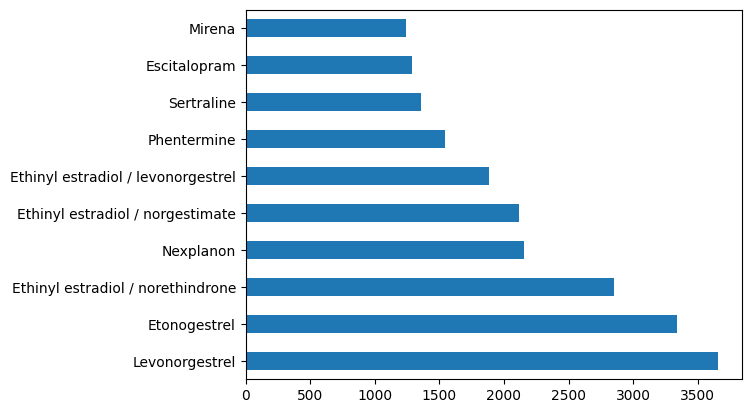

In [7]:
## DATA insights

# Top 10 most common drug Names
dataset["drugName"].value_counts().nlargest(n=10).plot.barh()

<AxesSubplot:>

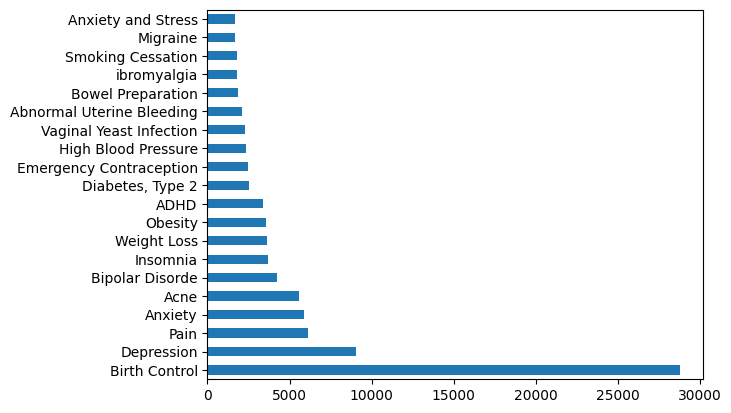

In [8]:
# Top 10 most common conditions
dataset["condition"].value_counts().nlargest(n=20).plot.barh()

In [9]:
dataset["rating"].values

array([ 9.,  8.,  5., ...,  2., 10.,  9.])

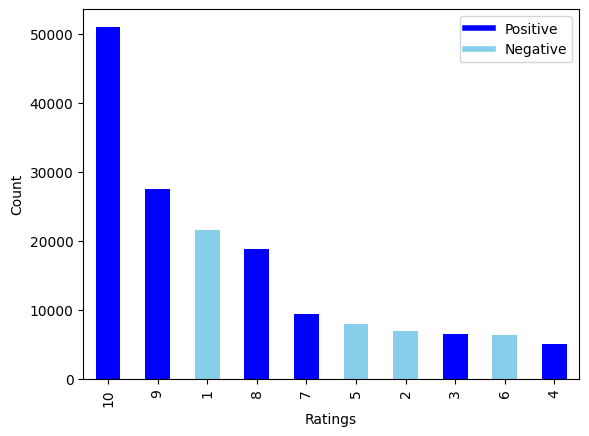

In [13]:
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
custom_lines = [Line2D([0],[0],color="blue",lw=4),
                Line2D([0],[0],color="skyblue",lw=4)]
colors = ["blue" if i > 5 else "skyblue" for i in dataset["rating"].values]

ax = dataset["rating"].astype('int').value_counts().plot.bar(color=colors,legend=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratings")
ax.legend(custom_lines,["Positive","Negative"])
plt.show()


In [14]:
classify = lambda x: "Positive" if x > 5 else "Negative"
dataset["outcome"] = dataset["rating"].map(classify)

In [ ]:
dataset.head(10)

In [20]:
# df = dataset.groupby("drugName")["drugName"].count().reset_index(name='counts')

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [48]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()

In [49]:
wordCloud_generator(dataset["review"],title="Top words in reviews")

NameError: name 'WordCloud' is not defined